# Image Caption Generator with CNN & LSTM

You saw an image and your brain can easily tell what the image is about, but can a computer tell what the image is representing? Computer vision researchers worked on this a lot and they considered it impossible until now! With the advancement in Deep learning techniques, availability of huge datasets and computer power, we can build models that can generate captions for an image.

This is what we are going to implement in this Python based project where we will use deep learning techniques of Convolutional Neural Networks and a type of Recurrent Neural Network (LSTM) together.

## What is Image Caption Generator?

Image caption generator is a task that involves computer vision and natural language processing concepts to recognize the context of an image and describe them in a natural language like English.

### Image Caption Generator with CNN – About the Python based Project

The objective of our project is to learn the concepts of a CNN and LSTM model and build a working model of Image caption generator by implementing CNN with LSTM.

In this Python project, we will be implementing the caption generator using **CNN (Convolutional Neural Networks)*** and LSTM **(Long short term memory)**. The image features will be extracted from Xception which is a CNN model trained on the imagenet dataset and then we feed the features into the LSTM model which will be responsible for generating the image captions.

# The Dataset of Python based Project

For the image caption generator, we will be using the Flickr_8K dataset. There are also other big datasets like Flickr_30K and MSCOCO dataset but it can take weeks just to train the network so we will be using a small Flickr8k dataset. The advantage of a huge dataset is that we can build better models.

we get dataset from **Kaggle** you can download it from here also : <a href="https://www.kaggle.com/datasets/adityajn105/flickr8k">Kaggle-Flicker8k</a> (Size: 1GB).


#### Let's Begin to code.

# Import Modules 

In [1]:
import os   # handling the files
import pickle # storing numpy features
import numpy as np
from tqdm.notebook import tqdm # how much data is process till now

from tensorflow.keras.applications.vgg16 import VGG16 , preprocess_input # extract features from image data.
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input , Dense , LSTM , Embedding , Dropout , add

2024-03-30 14:48:58.695540: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 14:48:58.695656: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 14:48:58.851498: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**os** - used to handle files using system commands.

**pickle** - used to store numpy features extracted

**numpy** - used to perform a wide variety of mathematical operations on arrays

**tqdm** - progress bar decorator for iterators. Includes a default range iterator printing to stderr.

**VGG16, preprocess_input** - imported modules for feature extraction from the image data

**load_img, img_to_array** - used for loading the image and converting the image to a numpy array

**Tokenizer** - used for loading the text as convert them into a token

**pad_sequences** - used for equal distribution of words in sentences filling the remaining spaces with zeros

**plot_model** - used to visualize the architecture of the model through different images

#### Now we must set the directories to use the data

In [2]:
BASE_DIR = '/kaggle/input/gans-10t-ic'
WORKING_DIR = '/kaggle/working'

# Extract Image Features

We have to load and restructure the model

VGG-16 is a convolutional neural network that is 16 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database [1]. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

In [3]:
# Load vgg16 Model
model = VGG16()

# restructure model
model = Model(inputs = model.inputs , outputs = model.layers[-2].output)

# Summerize
print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


+ Fully connected layer of the VGG16 model is not needed, just the previous layers to extract feature results.

+ By preference you may include more layers, but for quicker results avoid adding the unnecessary layers.

# extract the image features
Now we extract the image features and load the data for preprocess

In [4]:
# extract features from image
features = {}
directory = os.path.join(BASE_DIR, 'image-train')

for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.png')[0]
    # store feature
    features[image_id] = feature

  0%|          | 0/10000 [00:00<?, ?it/s]

I0000 00:00:1711810162.308610      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Dictionary 'features' is created and will be loaded with the extracted features of image data

**load_img(img_path, target_size=(224, 224))** - custom dimension to resize the image when loaded to the array

**image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))** - reshaping the image data to preprocess in a RGB type image.

**model.predict(image, verbose=0)** - extraction of features from the image

**img_name.split('.')[0]** - split of the image name from the extension to load only the image name.

In [5]:
!rm /kaggle/working/features.pkl

rm: cannot remove '/kaggle/working/features.pkl': No such file or directory


In [6]:
# store features in pickle
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

Extracted features are not stored in the disk, so re-extraction of features can extend running time

Dumps and store your dictionary in a pickle for reloading it to save time

In [7]:
# load features from pickle
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [8]:
# features

Load all your stored feature data to your project for quicker runtime 

## Load the Captions Data

Let us store the captions data from the text file

In [9]:
with open(os.path.join(BASE_DIR, 'needed_format.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

### Now we split and append the captions data with the image

In [10]:
# create mapping of image to captions
mapping = {}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # split the line by comma(,)
    tokens = line.split(',')
    if len(tokens) < 2:
        continue
    image_path, caption = tokens[0], tokens[1:]
    # extract image_id from image_path
    image_id = image_path.split('\\')[-1].split('.png')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)


  0%|          | 0/10001 [00:00<?, ?it/s]

+ Dictionary 'mapping' is created with key as image_id and values as the corresponding caption text

+ Same image may have multiple captions, **if image_id not in mapping: mapping[image_id] = []** creates a list for appending captions to the corresponding image

#### Now let us see the no. of images loaded

In [11]:
len(mapping)

10000

# Preprocess Text Data

In [12]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc., 
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

Defined to clean and convert the text for quicker process and better results

In [13]:
# mapping

Let us visualize the text **before** and **after** cleaning

In [14]:
# before preprocess of text
mapping['1301.3323v4-Figure10-1']

['classification accuracies are plotted as functios of the number of features .']

In [15]:
# preprocess the text
clean(mapping)

In [16]:
# after preprocess of text
mapping['1301.3323v4-Figure10-1']

['startseq classification accuracies are plotted as functios of the number of features endseq']

#### Next we will store the preprocessed captions into a list

In [17]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [18]:
len(all_captions)

10000

No. of unique captions stored

# 10 Captions
Let us see the first ten captions

In [19]:
all_captions[:10]

['startseq classification accuracies are plotted as functios of the number of features endseq',
 'startseq "tests on synthetic networks generated by the dg-dc model each point is based on 30 randomly generated networks with 2400. for each network and each model we choose the best result from independent runs initialized either with random assignments the suffix or the true block assignment the suffix each run consisted of the kl-heuristic followed by 06 mcmc steps our degree-generated dg block model performs much better on these networks than the degree-corrected dc model the non-degree-corrected sbm model doesn work at all ." endseq',
 'startseq ndcg with too fast decay 2−r does not converge does not have good distinguishability power either endseq',
 "startseq graphical image of `` two-factor model '' for advertising repetition previous researches have found that the repetitive advertising has both positive and negative effects on consumers attitude toward advertised products and the

# Processing of Text Data
Now we start processing the text data

In [20]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [21]:
vocab_size

18106

No. of unique words

In [22]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

245

+ Finding the maximum length of the captions, used for reference for the padding sequence.

# Train Test Split

#### After preprocessing the data now we will train, test and split

In [23]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

**Now we will define a batch and include the padding sequence**

In [24]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield (X1, X2), y
                X1, X2, y = list(), list(), list()
                n = 0

Padding sequence normalizes the size of all captions to the max size filling them with zeros for better results.

# Model Creation

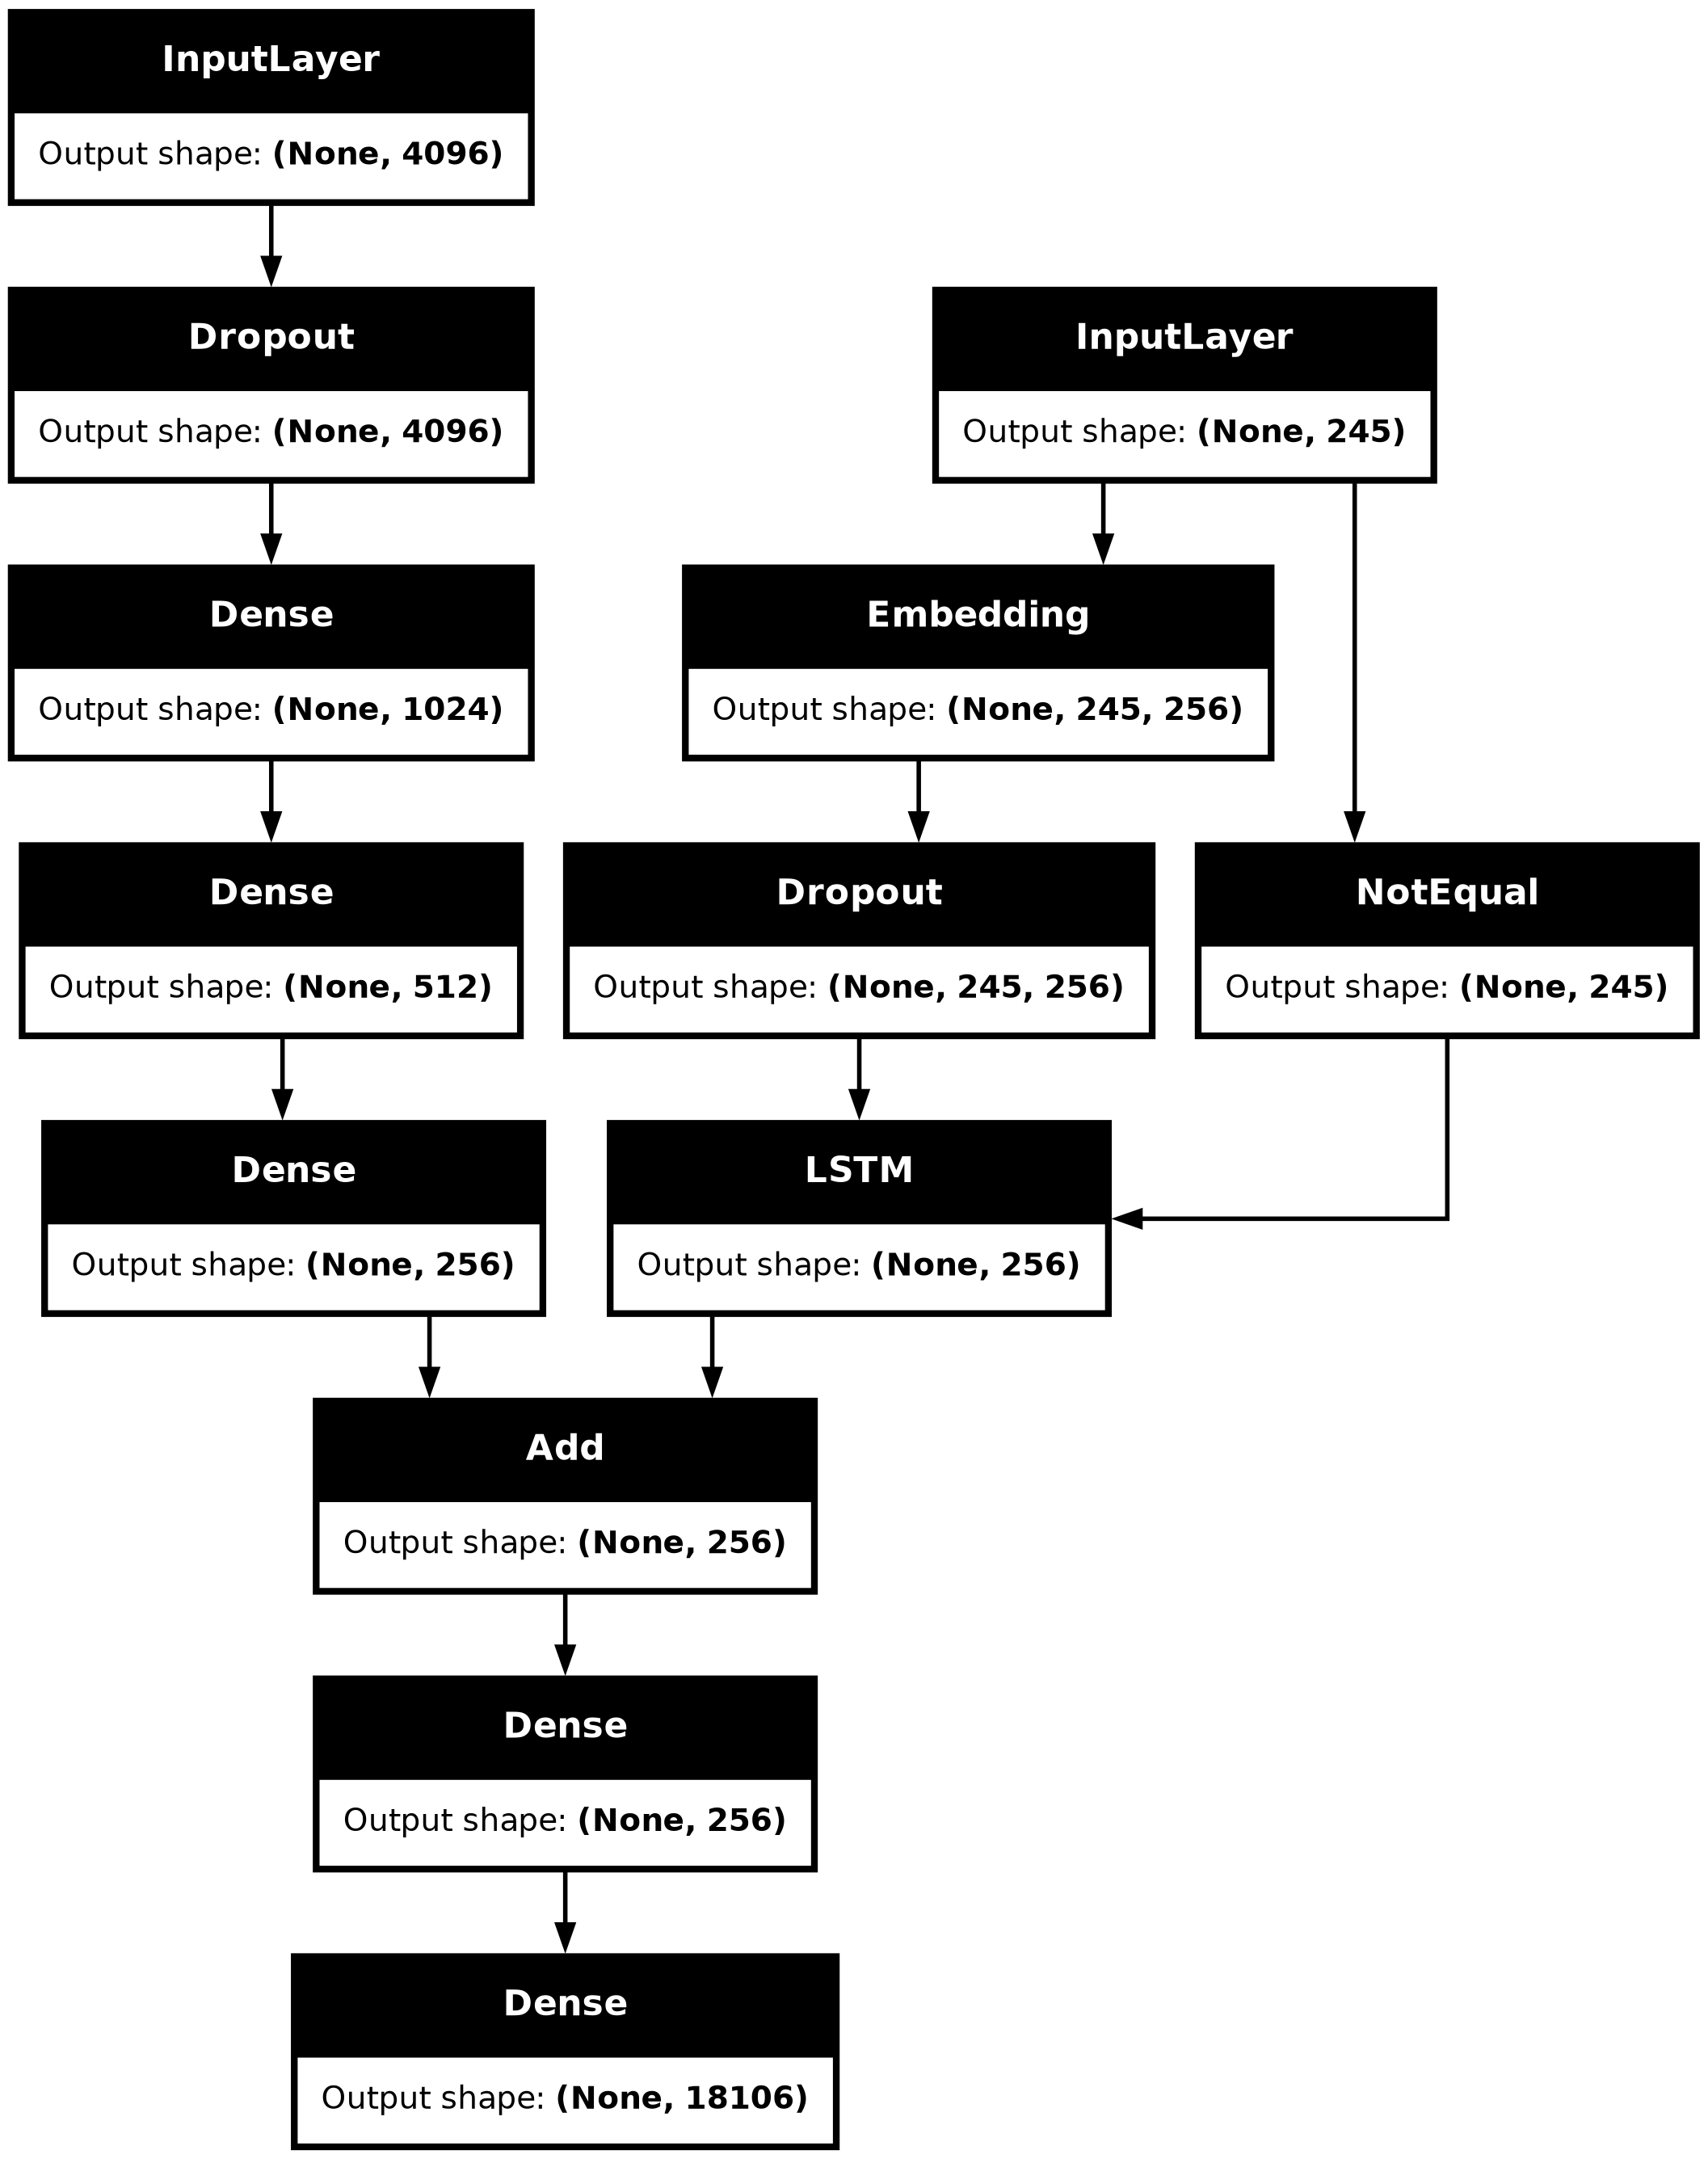

In [25]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(1024, activation='relu')(fe1)
fe3 = Dense(512, activation='relu')(fe2)
fe4 = Dense(256, activation='relu')(fe3)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe4, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

+ **shape=(4096,)** - output length of the features from the VGG model

+ **Dense** - single dimension linear layer array

+ **Dropout()** - used to add regularization to the data, avoiding over fitting & dropping out a fraction of the data from the layers

+ **model.compile()** - compilation of the model

+ **loss=’sparse_categorical_crossentropy’** - loss function for category outputs

+ **optimizer=’adam’** - automatically adjust the learning rate for the model over the no. of epochs

+ Model plot shows the concatenation of the inputs and outputs into a single layer

+ Feature extraction of image was already done using VGG, no CNN model was needed in this step.

# Train Model
Now let us train the model

In [26]:
# train the model
epochs = 100
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

281/281 ━━━━━━━━━━━━━━━━━━━━ 156s 533ms/step - loss: 7.3094
281/281 ━━━━━━━━━━━━━━━━━━━━ 147s 521ms/step - loss: 6.2354
281/281 ━━━━━━━━━━━━━━━━━━━━ 146s 521ms/step - loss: 5.8573
281/281 ━━━━━━━━━━━━━━━━━━━━ 147s 522ms/step - loss: 5.5718
281/281 ━━━━━━━━━━━━━━━━━━━━ 147s 524ms/step - loss: 5.3226
281/281 ━━━━━━━━━━━━━━━━━━━━ 147s 522ms/step - loss: 5.1516
281/281 ━━━━━━━━━━━━━━━━━━━━ 147s 522ms/step - loss: 4.9058
281/281 ━━━━━━━━━━━━━━━━━━━━ 147s 523ms/step - loss: 4.7312
281/281 ━━━━━━━━━━━━━━━━━━━━ 147s 524ms/step - loss: 4.6136
281/281 ━━━━━━━━━━━━━━━━━━━━ 148s 526ms/step - loss: 4.5168
281/281 ━━━━━━━━━━━━━━━━━━━━ 148s 527ms/step - loss: 4.2563
281/281 ━━━━━━━━━━━━━━━━━━━━ 146s 519ms/step - loss: 4.0962
281/281 ━━━━━━━━━━━━━━━━━━━━ 146s 519ms/step - loss: 3.9824
281/281 ━━━━━━━━━━━━━━━━━━━━ 146s 518ms/step - loss: 3.8111
281/281 ━━━━━━━━━━━━━━━━━━━━ 146s 520ms/step - loss: 3.7589
281/281 ━━━━━━━━━━━━━━━━━━━━ 146s 520ms/step - loss: 3.5703
281/281 ━━━━━━━━━━━━━━━━━━━━ 146s 520ms/

+ **steps = len(train) // batch_size** - back propagation and fetch the next data

+ Loss decreases gradually over the iterations

+ Increase the no. of epochs for better results

+ Assign the no. of epochs and batch size accordingly for quicker results


### You can save the model in the working directory for reuse

In [27]:
# save the model
model.save(WORKING_DIR+'/best_model.h5')

# Generate Captions for the Image

In [28]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

+ Convert the predicted index from the model into a word

In [29]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
    return in_text

+ Captiongenerator appending all the words for an image

+ The caption starts with 'startseq' and the model continues to predict the caption until the 'endseq' appeared

# Model Validation
Now we validate the data using BLEU Score

In [30]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))


  0%|          | 0/1000 [00:00<?, ?it/s]

BLEU-1: 0.171191
BLEU-2: 0.054204


+ BLEU Score is used to evaluate the predicted text against a reference text, in a list of tokens.

+ The reference text contains all the words appended from the captions data (actual_captions)

+ A BLEU Score more than **0.4 is considered a good result**, for a better score increase the no. of epochs accordingly.

In [31]:
test

['1806.09095v1-Figure5-1',
 '1512.03152v1-Figure3-1',
 '1707.04491v4-Figure9-1',
 '1401.7713v1-Figure7-1',
 '1801.05338v2-Figure4-1',
 '1808.00822v2-Figure1-1',
 '1011.4328v3-Figure4-1',
 '1306.2735v1-Figure2-1',
 '1903.01550v1-Figure6-1',
 '2009.10444v1-Figure10-1',
 '1012.4824v1-Figure5-1',
 '1904.00429v3-Figure2-1',
 '1904.00670v3-Figure9-1',
 '1709.04545v3-Figure7-1',
 '1708.02758v1-Figure13-1',
 '1603.01399v2-TableI-1',
 '2001.09453v1-Figure1-1',
 '1102.3561v1-Figure11-1',
 '1009.4300v1-Figure5-1',
 '2008.07192v1-Figure4-1',
 '1604.02723v1-Figure10-1',
 '1711.06588v3-Figure5-1',
 '2003.14141v1-Figure2-1',
 '1611.07941v1-Figure5-1',
 '1409.4489v1-Figure7-1',
 '1804.08458v1-Figure6-1',
 '1812.09504v1-Figure5-1',
 '1810.12044v1-Figure4-1',
 '1106.5158v1-Figure7-1',
 '1808.09688v1-Figure3-1',
 '2002.10429v1-Figure8-1',
 '1307.3158v1-Figure7-1',
 '2001.00748v2-Figure10-1',
 '1401.8226v1-Figure2-1',
 '1503.05968v3-Figure1-1',
 '2001.03917v1-Figure2-1',
 '1304.5297v1-Figure6-1',
 '2010.1

## Visualize the Results

In [32]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.png')[0]
    img_path = os.path.join(BASE_DIR, "image-train", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

+ Image caption generator defined

+ First prints the actual captions of the image then prints a predicted caption of the image

---------------------Actual---------------------
startseq "if eve wiretaps all the messages of node and has access to node dynamics and interaction topology then the initial state of node can be estimated under the privacy protocol in 13 ." endseq
--------------------Predicted--------------------
startseq the average sum rate vs the qos requirement endseq


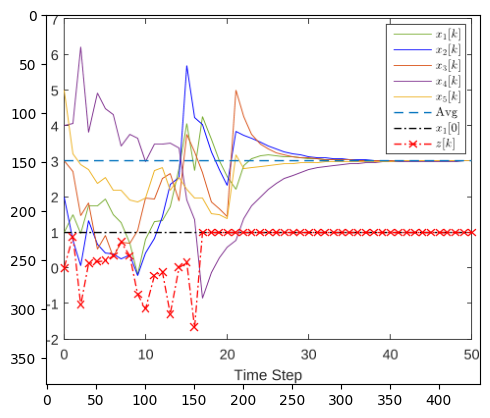

In [33]:
generate_caption("1707.04491v4-Figure9-1.png")

---------------------Actual---------------------
startseq "ata-p speed-up matrix size 5000 10000 ." endseq
--------------------Predicted--------------------
startseq the average sum rate vs the qos exponent for the xp harq scheme endseq


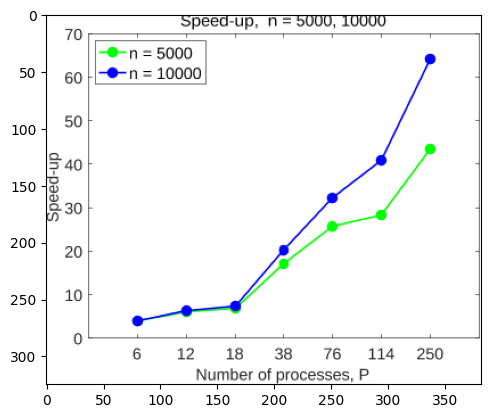

In [34]:
generate_caption("1902.02104v1-Figure6-1.png")

---------------------Actual---------------------
startseq "average transmission bit rate per available resources rq pq∆q in terms of total nlis and ase noise xq yq eq for different values of osnr margin in european cost239 optical network with 46 transmit transponders ." endseq
--------------------Predicted--------------------
startseq the average sum rate vs the qos exponent for the xp harq scheme endseq


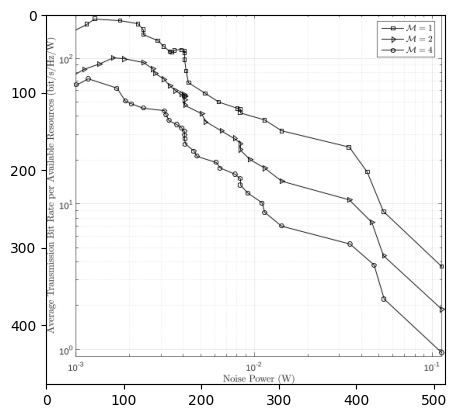

In [35]:
generate_caption("1705.01191v1-Figure7-1.png")

# Final Thoughts

+ Training the model by increasing the no. of epochs can give better and more accurate results.

+ Processing large amount of data can take a lot of time and system resource.

+ The no. of layers of the model can be increased if you want to process large dataset like flickr32k.



**In this project , we have built an Image Caption Generator exploring the Flickr Dataset as an advanced deep learning project using different models from image extraction and text based processing.** 